In [1]:
import numpy as np
import pandas as pd
from keras import layers,models
from keras.layers import LeakyReLU, BatchNormalization, Reshape, Dense, Dropout, Flatten,Conv2DTranspose,Conv2D
from keras.models import Sequential
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('fashion-mnist_train.csv')
train_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6,0,0,0,0,0,0,0,5,0,...,0.0,0.0,0.0,30.0,43.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,2,0,0,0,0,...,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
X_train = train_data.drop('label',axis=1)
X_train.head()
X_train=X_train.values
print(X_train.shape)
X_train=X_train.reshape(-1,28,28,1)
print(X_train.shape)

(2839, 784)
(2839, 28, 28, 1)


In [4]:
X_train =  X_train.astype('float32')
X_train = X_train/255
X_train = X_train*2 - 1
print(X_train.max(),X_train.min())

nan nan


In [5]:
generator = Sequential()
generator.add(Dense(7 * 7 * 128, input_shape=[100]))
generator.add(Reshape([7, 7, 128]))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))
generator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6272)              633472    
                                                                 
 reshape (Reshape)           (None, 7, 7, 128)         0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 128)         512       
 Normalization)                                                  
                                                                 
 conv2d_transpose (Conv2DTr  (None, 14, 14, 64)        204864    
 anspose)                                                        
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        256       
 chNormalization)                                                
                                                        

In [6]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=[28, 28, 1]))
discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 64)        1664      
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 7, 7, 128)         204928    
                                                                 
 dropout_1 (Dropout)         (None, 7, 7, 128)         0         
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_1 (Dense)             (None, 1)                 6273      
                                                                 
Total params: 212865 (831.50 KB)
Trainable params: 212

In [7]:
GAN =Sequential([generator,discriminator])
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False
GAN.compile(optimizer='adam',loss='binary_crossentropy')
GAN.layers
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 28, 28, 1)         840705    
                                                                 
 sequential_1 (Sequential)   (None, 1)                 212865    
                                                                 
Total params: 1053570 (4.02 MB)
Trainable params: 840321 (3.21 MB)
Non-trainable params: 213249 (833.00 KB)
_________________________________________________________________


Currently on Epoch 1
1/1 [==============================] - 0s 30ms/step


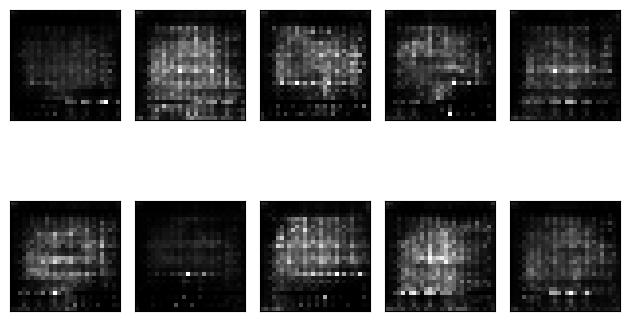

Currently on Epoch 2
Currently on Epoch 3
Currently on Epoch 4
Currently on Epoch 5
Currently on Epoch 6
Currently on Epoch 7
Currently on Epoch 8
Currently on Epoch 9
Currently on Epoch 10
Currently on Epoch 11
1/1 [==============================] - 0s 27ms/step


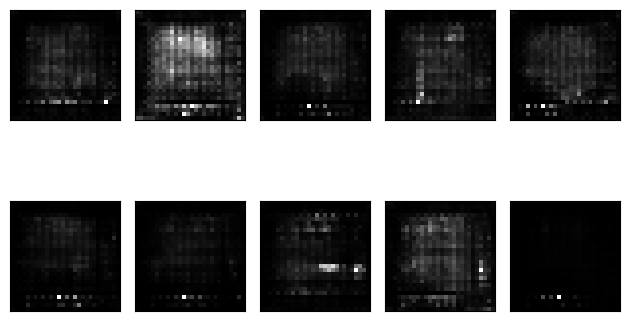

Currently on Epoch 12
Currently on Epoch 13
Currently on Epoch 14
Currently on Epoch 15
Currently on Epoch 16
Currently on Epoch 17
Currently on Epoch 18
Currently on Epoch 19
Currently on Epoch 20
Currently on Epoch 21
1/1 [==============================] - 0s 40ms/step


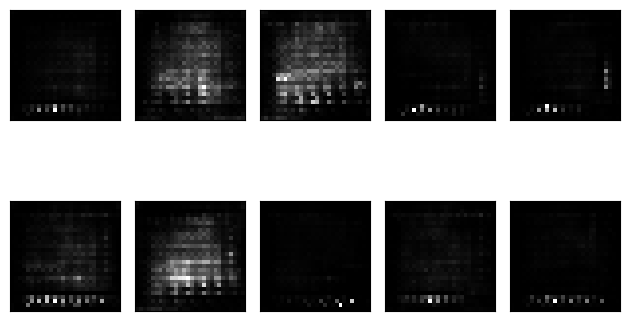

Currently on Epoch 22
Currently on Epoch 23
Currently on Epoch 24
Currently on Epoch 25
Training is complete


In [17]:
epochs = 25
batch_size = 100
noise_shape = 100

with tf.device('/gpu:0'):
    for epoch in range(epochs):
        print(f"Currently on Epoch {epoch+1}")
        for i in range(X_train.shape[0] // batch_size):
            if (i+1) % 50 == 0:
                print(f"\tCurrently on batch number {i+1} of {X_train.shape[0]//batch_size}")
            noise = np.random.normal(size=[batch_size, noise_shape])
            gen_image = generator.predict_on_batch(noise)
            train_dataset = X_train[i*batch_size:(i+1)*batch_size]
            train_dataset = (train_dataset - 127.5) / 127.5
            train_label = np.ones(shape=(batch_size, 1))
            discriminator.trainable = True
            d_loss_real = discriminator.train_on_batch(train_dataset, train_label)
            train_label = np.zeros(shape=(batch_size, 1))
            d_loss_fake = discriminator.train_on_batch(gen_image, train_label)
            noise = np.random.normal(size=[batch_size, noise_shape])
            train_label = np.ones(shape=(batch_size, 1))
            discriminator.trainable = False
            d_g_loss_batch = GAN.train_on_batch(noise, train_label)
        if epoch % 10 == 0:
            samples = 10
            x_fake = generator.predict(np.random.normal(loc=0, scale=1, size=(samples, 100)))
            for k in range(samples):
                plt.subplot(2, 5, k+1)
                plt.imshow(x_fake[k].reshape(28, 28), cmap='gray')
                plt.xticks([])
                plt.yticks([])
            plt.tight_layout()
            plt.show()
    print('Training is complete')


4/4 [==============================] - 0s 21ms/step


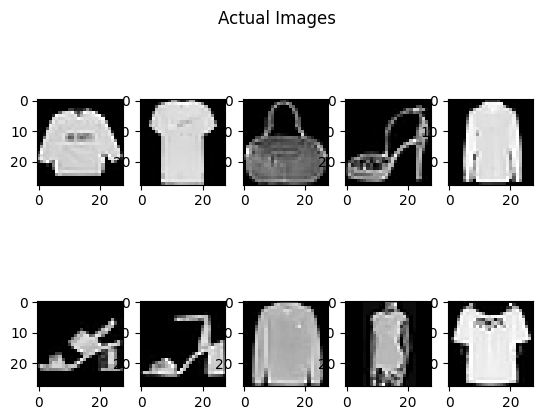

In [18]:
noise = np.random.normal(loc=0, scale=1, size=(100,noise_shape))
gen_image = generator.predict(noise)
fig,axe = plt.subplots(2,5)
fig.suptitle("Actual Images")
idx = 0
for i in range(2):
    for j in range(5):
        axe[i,j].imshow(X_train[idx].reshape(28,28),cmap='gray')
        idx+=10

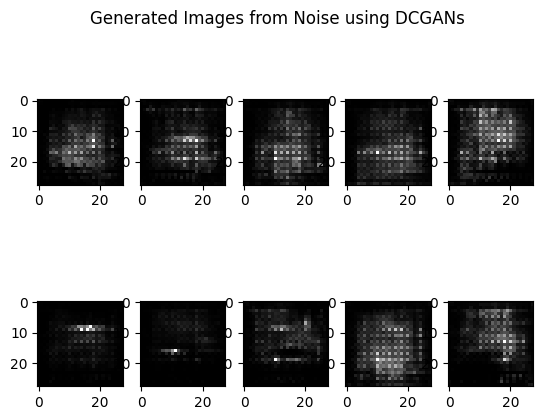

In [19]:
fig,axe=plt.subplots(2,5)
fig.suptitle('Generated Images from Noise using DCGANs')
idx=0
for i in range(2):
     for j in range(5):
         axe[i,j].imshow(gen_image[idx].reshape(28,28),cmap='gray')
         idx+=3